# **Data Science Intern** @BharatIntern

#### Author - Payal Nagare

### **TASK-1 SMS Clasifier**

In [3]:
from google.colab import files
uploaded=files.upload()
import pandas as pd
import seaborn as sn

Saving SMSSpamCollection to SMSSpamCollection


In [4]:
df=pd.read_csv('SMSSpamCollection', sep='\t', names=['label','text'])
print(df)

     label                                               text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [5]:
print(df.shape)

(5572, 2)


In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
sent = 'How are you friends?'
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
swords = stopwords.words('english')
from nltk.stem import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [9]:
#A]Data pre-processing
def clean_text(sent):
  tokens = word_tokenize(sent)
  clean = [word for word in  tokens
           if word.isdigit()or word.isalpha()]

  clean =[ps.stem(word) for word in clean
          if word not in swords]
  return(clean)
clean_text(sent)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer=clean_text)
x=df['text']
y=df['label']
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object


In [10]:
print(y)

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object


In [11]:
x_new=tfidf.fit_transform(x)

In [12]:
print(x.shape)

(5572,)


In [14]:
print(x_new.shape)



(5572, 6513)


In [15]:
y.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [16]:
#b) Train-Test-Split(Cross Validation)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_new,y, random_state=0,test_size=.25)
x_train.shape
x_test.shape

(1393, 6513)

              precision    recall  f1-score   support

         ham       0.98      0.87      0.92      1208
        spam       0.51      0.89      0.65       185

    accuracy                           0.87      1393
   macro avg       0.75      0.88      0.79      1393
weighted avg       0.92      0.87      0.89      1393



0.8729361091170137

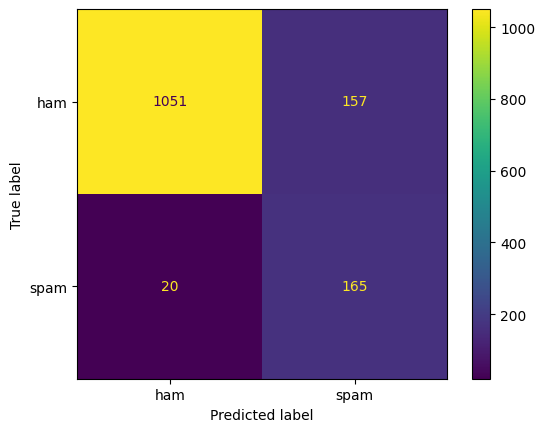

In [19]:
#1 Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train.toarray(),y_train)
y_pred=nb.predict(x_test.toarray())
y_test.value_counts()
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.86      0.92       185

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393



0.9806173725771715

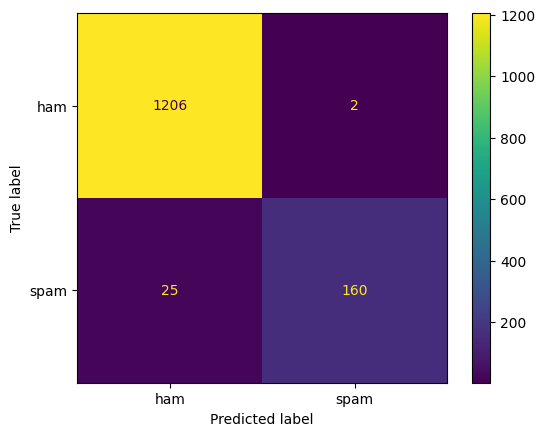

In [20]:
#2 Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1208
        spam       0.99      0.74      0.84       185

    accuracy                           0.96      1393
   macro avg       0.98      0.87      0.91      1393
weighted avg       0.97      0.96      0.96      1393



0.9641062455132807

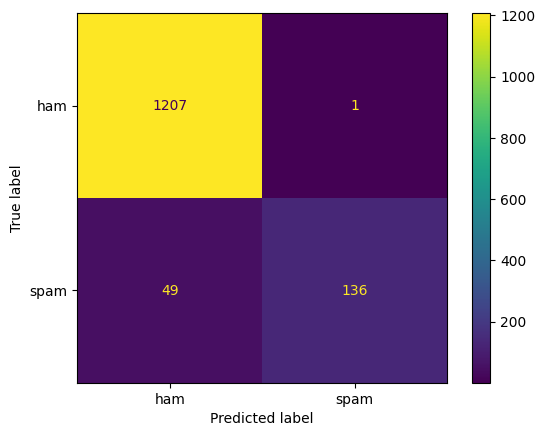

In [21]:
#3 Logistic Regression
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred=log.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred)